https://github.com/ageron/handson-ml

- Stock market investment
    - current stock price is 100
    - tomorrow stock price is 110, net profit of 10
    - tomorrow stock price is 90, net losss of 10
- Future contract 
    - Buy a future contract with premium 1
    - underlying stock current value is 100
    - tomorrow the stock price is 110, so you execute future contract and get 10, and net profit 9
    - tomorrow the tock price is 90, you execute future contract and loss 10 and net loss is 11
    - Invest 100 and get 100 such contract
    - If price movement is in your favour, you get net profit of 100 * 9 = 900
    - If price movement is not in your favour, you get loss of 100 * 11 = 1100
    
- Use of machine learning in future contract
    - Predict the direction with good accuracy
    - UP or down
    - classification method
    - logistic regression
    - Decision tree classification
    - SVM classification 
    - Ensembling methods, bagging, boosting, random forest
    - Neural network, deep learning
    - Training and Testing data
    - Develop model on training data
    - Check accuracy on testing data


# End to End machine learning project
- Look at the big picture
- Get the data
- Discover and visualize the data to gain insights (csv file and in python)
- Prepare the data for Machine learning algorithms (in python)
- Select a model and train it
- Fine tune your model
- Present your solution
- Launch, monitor and maintain your system

### Look at the big picture
- Develop a model of housing prices in california using the california census data
- Population, median income, median housing price etc are metrics
- Model learn from the data and be able to predict the median housing price in any district

### Frame the problem
- Business objective, other than building a model. this help in
    - Algorithm selection
    - Performance measure selection
    - Check the existing solution. This will give you a reference performance
    - Frame the problem
        - Supervised
            - Regression
            - Classification
        - Unsupervised
        - Reinforcement learning
        - Batch learning or online learning
        - If the data is huge, split your batch learning work across multiple servers using map reduce or use online learning 
    - Select  a performance measure
        - RMSE (standard deviation) of the errors the system makes in prediction for regression
    - Check the assumptions
        
        
    


### Housing Price in California
- Supervised learning with labelled training examples
- Regression problem to predict a value
- Multivariate regression as system use multiple features to make a prediction
- No continous flow of data coming in the system, data small enough to fit in memory so plain batch learning
- Check the assumption. This can catch serious issues early on. For example the district prices that your system outputs ar going to be uses as such. But what if the downstream system actually converts the prices into categories ("cheap", "expenstive"), and use those categories instead of the prices themselves. In this case getting price perfectly right is not important at all, system just needs to get the category right, this should have been then planned as classification, not a regression task.



# Pipelines

- A sequence of data processing components is called a data pipeline. These are very
common in Machine Learning systems, since there is a lot of data to manipulate and
many data transformations to apply.
- Components typically run asynchronously, each component pulls in a large amount
of data, processes it and spits out the result in another data store, then some time later
the next component in the pipeline pulls this data and spits out its own output, and so
on. 
- Each component is fairly self-contained, the interface between components is
simply the data store. This makes the system quite simple to grasp (with the help of a
data flow graph), and different teams can focus on different components. 
- if a component breaks down, the downstream components can often continue to run
normally (at least for a while) by just using the last output from the broken component.
This makes the architecture quite robust.

### Machine learning pipeline for real estate investments
![](img/pipeline.PNG)

In [4]:
import os
import tarfile
# import urllib.request

In [5]:
import pandas as pd
import numpy as np
import numpy.random as rnd

### Download Housing Data

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path= HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [5]:
fetch_housing_data()

NameError: name 'urllib' is not defined

### Read data

In [1]:
HOUSING_PATH = "data"
HOUSING_PATH

'data'

In [2]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    print(csv_path)
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()

NameError: name 'os' is not defined

In [23]:
help(load_housing_data)

Help on function load_housing_data in module __main__:

load_housing_data(housing_path='data')



In [ ]:
- The data is in csv file and can be downloaded from browser
- Creating a method to download the data would be good so that any for any change in the data, updated data can be downloaded at any time
- Automating the process of fetching the data is good if you need to install dataset on multiple machine

### Initial Data Analysis

In [33]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


- Each row represents one district
- Total room, beedroom, population, households are counted
- House age, income, value is calculated as median in the district

In [29]:
housing.describe()
# categorical variablus are not summerized in describe function

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [30]:
housing.info()
# This method prints information about a data frame including the index dtype and column dtypes, non-null values and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


- 20640 instances in dataset, it is fairly small by machine learning standards
- Total bed room has only 20433 non null values, meaning 207 districts are missing this feature
- All attributes are numerical, except the ocean proximity field. its type is object, so it could hold any kind of python object. Since data is from a CSV file, it must be a text attribute.



In [32]:
housing["latitude"].value_counts()

34.06    244
34.05    236
34.08    234
34.07    231
34.04    221
        ... 
41.01      1
41.36      1
41.13      1
40.30      1
35.88      1
Name: latitude, Length: 862, dtype: int64

In [8]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
type(housing)

pandas.core.frame.DataFrame

### Temp data frame

In [9]:
temp = housing.copy()

In [10]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
temp['longitude'] = temp['ocean_proximity']

In [12]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null object
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(8), object(2)
memory usage: 1.6+ MB


In [13]:
temp.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,NEAR BAY,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,NEAR BAY,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,NEAR BAY,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,NEAR BAY,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,NEAR BAY,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### EDA

### Visualization

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
housing.

In [19]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


NameError: name 'save_fig' is not defined

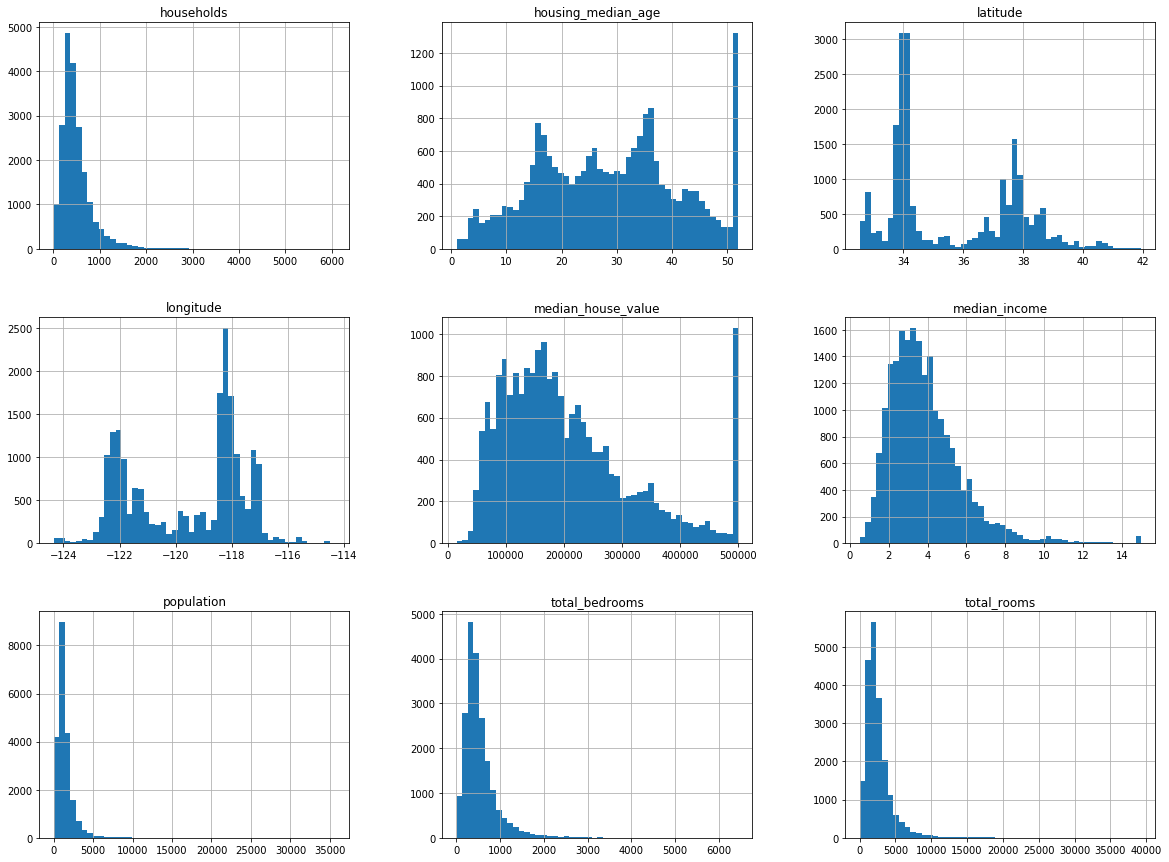

In [18]:
# hist() method on the whole dataset plot a histogram for each numerical attribute
housing.hist(bins=50, figsize=(20,15))
# save_fig("attribute_histogram_plots")
plt.show()

- Median income value is capped for heigher median income and lower median incomes
- housing median age and housing median value are also capped. 
- Capping housing median value is serious problem as algorithm may learn that prices never go beyound that limit. Two possible solution
    - Collect proper label for the districts whose labels were capped
    - Remove those districs from the training set and also from test set as the system should not be evaluated poorly if it predicts values beyond capped
    - The attributes have very different scales. Explore feature scaling before developing machine learning model
    - Many histogram are tail heavy. They extend much farther to the right of the median than to the left. This may make it a big harder 
    for some Machine Algorithms to detect patterns. Transform these attributes later on to have more bell-shaped distributions.
    

- boxplot
- scattered plot between two or more varibales
- correlation calculations

### Train and Test data

### Create a test set
- Avoid data snooping bias
- 80-20 setting train test data
- 70-30 setting train test data

![](img/train_test.png)

![](img/train_test1.png)

![](img/train_test2.png)

In [18]:
[1, 2, 3, 4, 5]
[3, 2, 4, 5, 1]

[4, 5, 2, 1, 3]
20640 * 0.2

4128.0

In [20]:
len(housing)

20640

In [22]:
len(housing) * 0.8

16512.0

In [21]:
len(housing) * 0.2

4128.0

In [20]:
len(housing) * 0.2

[3, 2, 4, 5, 1]

[3, 2, 4, 5, 1]

In [23]:
def split_train_test(data, test_ratio):
    shuffled_indices = rnd.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [24]:
train_set, test_set = split_train_test(housing, 0.2)

In [25]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [24]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11799,-121.27,38.87,16.0,2094.0,358.0,1092.0,357.0,4.4769,191400.0,INLAND
11037,-117.81,33.82,20.0,2819.0,319.0,1019.0,319.0,12.2092,500001.0,<1H OCEAN
15809,-122.43,37.76,52.0,3771.0,1017.0,1575.0,921.0,3.5655,427300.0,NEAR BAY
18036,-121.91,37.23,22.0,2614.0,453.0,1240.0,462.0,6.0712,271800.0,<1H OCEAN
3690,-118.36,34.22,37.0,1512.0,348.0,1545.0,351.0,3.7663,160300.0,<1H OCEAN


In [25]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8842,-118.38,34.09,28.0,4001.0,1352.0,1799.0,1220.0,2.5784,272900.0,<1H OCEAN
18592,-122.07,37.13,26.0,1127.0,199.0,543.0,199.0,4.9792,240000.0,NEAR OCEAN
7728,-118.13,33.92,28.0,3069.0,864.0,1932.0,835.0,2.4925,177200.0,<1H OCEAN
20580,-121.77,38.76,32.0,1950.0,385.0,1145.0,363.0,2.8365,87900.0,INLAND
2513,-122.18,39.75,30.0,4157.0,834.0,1885.0,774.0,1.6948,67500.0,INLAND


### seed

- Running the program again will generate a different set.
- Over time, you or your machine learning algorithm will get to see the whole dataset, this need to be avoided
- set the random number generator seed before calling permutation so that it always generates the same shuffled indices.
- You will often see people set the random seed to 42, this number has no special property, other than to be the answer to the ultimate question of life, the universe.. 

In [26]:
# use rnd.seed(42) to generate same test set for every run

### Issue with updating data

- The above solution breakdown once you fetch an updated dataset
- Use each instance identifier to decide whether or not it should go in the test set, assuming insances have a unique and immutable identifer
- Compute a hash of each instances identifer, keep only the last bute of the hash and put the instance in the test set if this value is lower or equal to 51 (20% of 256)

In [27]:
import hashlib

In [28]:
def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [29]:
test_set_check(np.int64(13), 0.2, hash=hashlib.md5)

False

In [30]:
def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [31]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [32]:
housing_with_id = housing.reset_index()
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [33]:
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [34]:
# new data need to be appended to the end of the dataset, if that is not possible use latitude and longitude 
#which are guaranteed to be stable for a few million years
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [35]:
housing_with_id.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15


### scikit learn for train test split

In [26]:
# scikit learn function for random sampling
from sklearn.model_selection import train_test_split

In [27]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=0.25)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, 

In [28]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

- Avoiding sampling bias, stratified sampling, 
- The population is divded into homogeneious subgrouns called stratea and right number of
 instances is sampled from each stratum to guarantee that the test set is representative of the overall population

In [29]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [30]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [31]:
len(train_set)

16512

In [32]:
len(test_set)

4128

In [41]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Stratified sampling

- Median income is a very important attribute to predict median housing
- Make sure that test set is representative of the various categories of incomes in the whole dataset
- Medium income is a continous numerical attribute, first create an income category attribute.
- Create income category attribute by dividing the median income by 1.5, rounding up using ceil, then merging all the categories greater than 5 into category 5
- If dataset is large enough, random sampling is fine. Significant sampling bias may happen if dataset is not large. Example: US survey company call 1000 people to ask them a few questions, they do not just pick 1000 people randomly in a phonebooth. They try to enuse that these 1000 people are representative of the whole population. US population is composed of 51.3% female and 48.7% male, so a well conducted survey in the US would try to maintain this ration in the sample, 513 female and 487 male. 
- Stratified sampling, the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is repesentative of the overall population. If they used purely random sampling, there would be about 12% chance of sampling a skewd test set with either less than 49% female or more than 54% female, wither way the survey results would be significantly biased.

### Income category column

In [42]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)

In [43]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


In [44]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
income_cat            20640 non-null float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


In [45]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,3.093362
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.303707
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,1.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,2.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,3.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,4.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,11.000000


In [46]:
housing['income_cat'].value_counts()

3.0     7236
2.0     6581
4.0     3639
5.0     1423
1.0      822
6.0      532
7.0      189
8.0      105
9.0       50
11.0      49
10.0      14
Name: income_cat, dtype: int64

In [47]:
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [48]:
housing['income_cat'].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

### Startified sampling based on income category 

In [49]:
housing['income_cat'][1:10]

1    5.0
2    5.0
3    4.0
4    3.0
5    3.0
6    3.0
7    3.0
8    2.0
9    3.0
Name: income_cat, dtype: float64

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit

### Example

In [51]:
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([0, 0, 0, 1, 1, 1])

In [52]:
print(X)
print(y)

[[1 2]
 [3 4]
 [1 2]
 [3 4]
 [1 2]
 [3 4]]
[0 0 0 1 1 1]


In [53]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

In [54]:
sss.n_splits

1

In [55]:
sss.get_n_splits

<bound method BaseShuffleSplit.get_n_splits of StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=0.2,
            train_size=None)>

In [56]:
sss.test_size

0.2

In [57]:
sss.train_size

In [58]:
split = sss.split(X,y)

In [59]:
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [2 5 1 3] TEST: [0 4]


In [60]:
X_train

array([[1, 2],
       [3, 4],
       [3, 4],
       [3, 4]])

In [61]:
X_test

array([[1, 2],
       [1, 2]])

In [62]:
y_train

array([0, 1, 0, 1])

In [63]:
y_test

array([0, 1])

### For housing data

In [64]:
sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2,train_size=0.8)

In [65]:
len(housing)

20640

In [66]:
splits = sss.split(np.zeros(len(housing)), y=housing['income_cat'])

In [67]:
for train_index, test_index in splits:
    print("Train:", train_index, "\nTest:", test_index)

Train: [14221 16957  2748 ...   131  5885  4517] 
Test: [ 3232  7989  8614 ...  9671 10844  9302]


In [68]:
strat_train_set = housing.loc[train_index]

In [69]:
strat_test_set = housing.loc[test_index]

In [70]:
train_indices, test_indices = next(iter(split))

### Check the sampling

In [71]:
housing['income_cat'].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [72]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [73]:
strat_train_set['income_cat'].value_counts() / len(strat_train_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

### Random Sampling

In [74]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [75]:
test_set['income_cat'].value_counts() / len(test_set)

3.0    0.358527
2.0    0.324370
4.0    0.167393
5.0    0.109496
1.0    0.040213
Name: income_cat, dtype: float64

In [76]:
train_set['income_cat'].value_counts() / len(train_set)

3.0    0.348595
2.0    0.317466
4.0    0.178537
5.0    0.115673
1.0    0.039729
Name: income_cat, dtype: float64

#### Remove income category used for stratified sampling

In [77]:
# remove income_cat from test and train set
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis = 1, inplace=True)

### Test set generation
-  Neglected but critical part of a machine learning project
- These ideas will be useful while discussing cross validation

### Discover and visualize the data to gain insights

In [78]:
# copy of training set
housing_train = strat_train_set.copy()

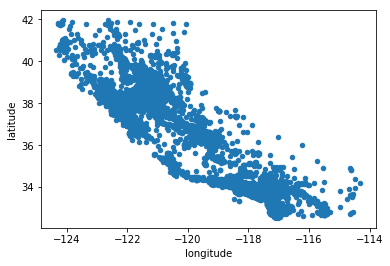

In [79]:
# lat, long plot
housing_train.plot(kind="scatter", x = "longitude", y = "latitude")

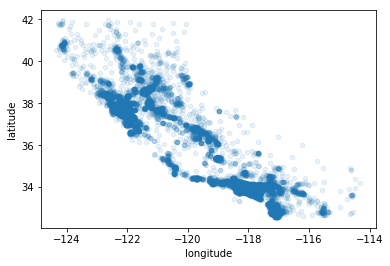

In [80]:
# set alpha for see the places where there is a high density of data points
housing_train.plot(kind="scatter", x = "longitude", y = "latitude", alpha = 0.1)

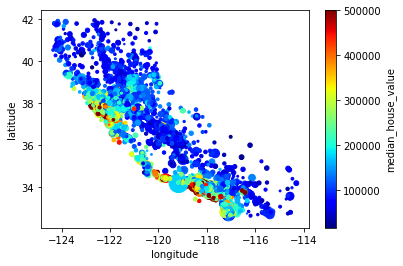

In [81]:
housing_train.plot(kind='scatter', x = 'longitude', y = 'latitude', s = housing['population']/100, c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True)

In [82]:
housing.median_house_value

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
5        269700.0
6        299200.0
7        241400.0
8        226700.0
9        261100.0
10       281500.0
11       241800.0
12       213500.0
13       191300.0
14       159200.0
15       140000.0
16       152500.0
17       155500.0
18       158700.0
19       162900.0
20       147500.0
21       159800.0
22       113900.0
23        99700.0
24       132600.0
25       107500.0
26        93800.0
27       105500.0
28       108900.0
29       132000.0
           ...   
20610     45500.0
20611     47000.0
20612     48300.0
20613     53400.0
20614     58000.0
20615     57500.0
20616     55100.0
20617     70800.0
20618     63400.0
20619     99100.0
20620    100000.0
20621     77500.0
20622     67000.0
20623     65500.0
20624     87200.0
20625     72000.0
20626     93800.0
20627    162500.0
20628     92400.0
20629    108300.0
20630    112000.0
20631    107200.0
20632    115600.0
20633     98300.0
20634    1

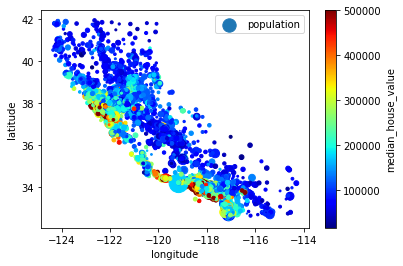

In [83]:
housing_train.plot(kind="scatter", x = "longitude", y = "latitude",
            s = housing["population"]/100, label = "population",
            c = "median_house_value", cmap = plt.get_cmap('jet'), colorbar = True)


- Housing prices are very much related to the location (close to ocean) and to population density
- Clustering algorithm to detect main clusters
- Add new features that measure the proximity to the cluster centers
- Feature based on ocean proximity attribute may be useful


In [84]:
housing_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14221,-117.06,32.66,24.0,2587.0,491.0,1617.0,458.0,3.5066,133400.0,NEAR OCEAN
16957,-122.31,37.52,35.0,1817.0,262.0,659.0,262.0,6.8336,457200.0,NEAR OCEAN
2748,-115.57,32.78,15.0,1413.0,279.0,803.0,277.0,4.3021,87500.0,INLAND
3254,-120.14,36.00,33.0,1726.0,420.0,1371.0,388.0,2.0335,43900.0,INLAND
11879,-117.38,33.98,52.0,2274.0,571.0,1167.0,504.0,2.0284,101600.0,INLAND


### Correlations

In [85]:
# correlation values
cor_matrix = housing_train.corr()

In [86]:
cor_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924814,-0.105770,0.047265,0.071483,0.100823,0.057883,-0.016801,-0.048066
latitude,-0.924814,1.000000,0.010102,-0.040966,-0.070681,-0.111444,-0.075244,-0.078386,-0.142316
housing_median_age,-0.105770,0.010102,1.000000,-0.356727,-0.316538,-0.291124,-0.299087,-0.119379,0.104422
total_rooms,0.047265,-0.040966,-0.356727,1.000000,0.931643,0.859447,0.919848,0.194428,0.135394
total_bedrooms,0.071483,-0.070681,-0.316538,0.931643,1.000000,0.878281,0.979516,-0.008477,0.051681
population,0.100823,-0.111444,-0.291124,0.859447,0.878281,1.000000,0.907484,0.006293,-0.020434
households,0.057883,-0.075244,-0.299087,0.919848,0.979516,0.907484,1.000000,0.012380,0.068034
median_income,-0.016801,-0.078386,-0.119379,0.194428,-0.008477,0.006293,0.012380,1.000000,0.686981
median_house_value,-0.048066,-0.142316,0.104422,0.135394,0.051681,-0.020434,0.068034,0.686981,1.000000


In [87]:
cor_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.686981
total_rooms           0.135394
housing_median_age    0.104422
households            0.068034
total_bedrooms        0.051681
population           -0.020434
longitude            -0.048066
latitude             -0.142316
Name: median_house_value, dtype: float64

- The correlation coefficient only measures linear correlations. It may completely miss out on non-linear relationships 
- Correlation coefficient ranges from -1 to 1, 
- When it is close to 1, it means that there is a strong positive correlation. The median house value tends to go up when the median income goes up
- When the coefficient is close to -1, it means that there is strong negative correlation, you can see a small negative correlation between the latitude and the median house value (price have a slight tendency to go down when you go North)
- Coefficients close to zero mean that there is no linear correlation
- 

### Plotting for correlation

In [88]:
from pandas.tools.plotting import scatter_matrix

ModuleNotFoundError: No module named 'pandas.tools'

In [141]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

In [228]:
# scatter_matrix(housing[attributes], figsize = (12,8))
plt.show()

- On diagonal variable  is not plotted aginst to itself, rather histogram is plotted
- The most promising attribute to predict the median house value is the median income

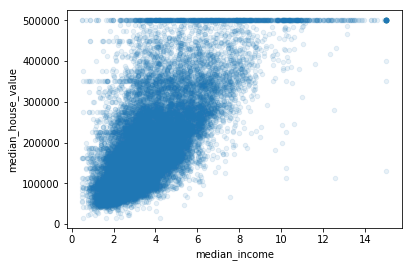

In [89]:
housing.plot(kind="scatter", x = "median_income", y = "median_house_value", alpha = 0.1)

- Correlation between median income and median housing value is very strong
- Upward trend and points are not to dispersed
- Price cap is visiable as a horizontal line at 500K
- Horizontal line around 450, 350, 280K
- Remove the correspondign districts to prevent algorithms from learning to reproduce these data quirks


- Population very big
- machine learning model
- Sample if population is very big
- if population is small, train, test split
- develop model on training set
- check performance on test set
- proper representative of sample in test and training
- train test split
- sklearn
- shuffling
- bias
- random sampling
- cancer patient 
- all category has proper representation
- biased sample
- home work: how to handel biased sample
- stratified sampling
- Correlation
- correlaion tells which variable is affecting the correlated variable
- housing price is affected by housing income
- housing price is less affected by houshold, population, total room, total bedroom

### Exprimeting with attribute combination

In [90]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

- Total number of rooms in a district is not very useful if you do not know how many households there are.
- Normalize number for per household
- Total number of bedroom par room

In [91]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["population_per_household"] = housing["population"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]

In [92]:
corr_matrix = housing.corr()

In [93]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
income_cat                  0.643892
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

- The new bedrooms per room attribute is much more correlated with the median house value than the total number of rooms or bedorooms
- The number of rooms per household is also more informative than the total number of rooms in district, the larger the house, more expansive it is

### Prepare the data for machine learning

- Data cleaning
- Text and categorical data

In [33]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [94]:
# get clean data and separate predictors and the labels
housing = strat_train_set.drop("median_house_value", axis = 1)


In [95]:
housing_labels = strat_train_set['median_house_value'].copy()

In [96]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

### Data cleaning
- Get rid of the corresponding districts, row
- Get rid of the whole attribute, column
- Set the value to some value (zero, the mean, the median etc)
    - Compute the median value on training set, use it to fill the missing value in the training set
    - Save the median value that is computed, you will need it later to replace missing values inthe test set
    - This will be needed when system goes live to replace missing values in new data

![](img/Capture.PNG)

### Imputer class
- create an imputer instance with strategy hyper parameter


In [98]:
from sklearn.preprocessing import Imputer

In [227]:
# imputer = Imputer(strategy= 'median')

In [100]:
# median can only be computed on numerical attributes, create copy of data without text attribute

housing_num = housing.drop("ocean_proximity", axis = 1)

In [101]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [102]:
housing_num.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [103]:
# fit imputer instace to the training data and get median using fit

imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [104]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2118.    ,  434.    , 1163.    ,
        409.    ,    3.5333])

In [105]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2118.    ,  434.    , 1163.    ,
        409.    ,    3.5333])

In [106]:
# use trained imputer to transform the traiing set by replacing missing values by learned medians
X = imputer.transform(housing_num)

In [107]:
type(X)

numpy.ndarray

In [108]:
# The result is numpy array, get it back to pandas data frames
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### Scikit-Learn design
#### consistency
- Estimators, any object that can estimate some parameters based on a dataset is called estimator, example, imputer. Estimation is performed by fit()
It takes only a dataset as a prameter or two for supervised learnng, the second dataset contains the labels. Any other parameter needed to guide the estimation process is considered
a hyperparameter (imputer strategy), and it must be set as an instance variable via a constructor parameter.
- Transformers, some estimators, example inputer, can also perform a transform a data set. transform() method with the dataset to transform as a parameter. It returns the 
transformed dataset. All transformers also have a conveience method fit_transform() that is equivalent to calling fit() then transform().
- Predictors. Finally some estimators are capable of making predictions given a dataset, they are called predictors. LinearRegression model is a predictor. Predictor has a predict() method that 
takes a dataset of new instances and returns a dataset of corresponding predictions. 

#### Inspection
- All estimator hyperparameter are assessible directly via public instace variable example imputer.strategy, and all the estimator learned parameters
are also accessible via public instance variable with an underscore suffic example imputer.statistics_
#### Non-proliferation of classes
- Datasets are represented as numpy arrarys or scipy sparse matrices, instaed of home made classes, hypterparameters are just regular python strings or numbers
#### Composition
- Existing building blocks are reused as much as possible. For example it is easy to create a pipeline estimator from an arbitrary sequence of transformers followed by a final estimators
#### Sensible defaults
- Scikit learn provides reasonable default values for most parameters, making it easy to create a baseline workign system quickly

### Handling text and categorical attributes

- Most machine learning algorithms prefer to work with numbers so convert these text labels to numbers

In [109]:
# convert categories to integers
from sklearn.preprocessing import LabelEncoder

In [110]:
encoder = LabelEncoder()


In [111]:
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([4, 4, 1, ..., 3, 0, 0])

In [112]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


- Problem with Label is that category are not similar and while label allow distance measure
- Use one hot encoding
- One hot encoder convert categorical values into one hote vectors
- fit transform expects a 2D array and housing_cat_encoded is 1D array, reshape

In [226]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
# housing_cat_1hot

- Output is Scipy sparse matrix instead of Numpy array
- Useful when you have categorical variable with thousands of categories
- sparse array can be converted to dense Numpy array

In [114]:
# convert sparse array to numpy array
housing_cat_1hot.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [115]:
from sklearn.preprocessing import LabelBinarizer

In [116]:
encoder = LabelBinarizer()

In [117]:
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

- this returns dense numpy array by default. you can get a sparse matrix insread by passing sparse_output = True

### Custom transformers

- Write your own transformers for tasks such as custom cleanup operation or combining specific attributes

In [118]:
from sklearn.base import BaseEstimator, TransformerMixin

In [119]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

In [120]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self,X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [121]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)


In [122]:
housing_extra_attribs = attr_adder.transform(housing.values)

In [123]:
housing_extra_attribs[:2]

array([[-117.06, 32.66, 24.0, 2587.0, 491.0, 1617.0, 458.0, 3.5066,
        'NEAR OCEAN', 5.648471615720524, 3.53056768558952],
       [-122.31, 37.52, 35.0, 1817.0, 262.0, 659.0, 262.0, 6.8336,
        'NEAR OCEAN', 6.935114503816794, 2.515267175572519]], dtype=object)

In [124]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

### Feature scaling

- Feature scaling is important transformation needed to appy on data
- With few exceptions, machine learning algorithms do not perform well when the input numerical attributes have very different scales
- total number of rooms range from 6 to 39320, while median incomes only range from 0 to 15
- Scaling the target value is generally not required
- As with all the transormations, it is important to fit the scales to the training data only, not the full dataset (including the test set). Only then can you use them to transform the training set and the test set (and new data)

- Min max scaling, values are shifted and rescaled so that they end up ranging from 0 to 1
- Standardization
    - Subtracts the mean value and then devides by the variance so that the result distribution has unit variance
    - Standrization does not bound values to a specific range, which may be a problem for some algoritms, example neural network often expect an input value ranging from 0 to 1
    - Standrization is much less affected by outliers, for example suppose a district had a median income equal to 100 by mistake, then min max scaling would crush all the other values from 0-15 to 0-0.15, 
    whereas standardization would not be much affected

### Transformation pipelines

In [125]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [222]:
# num_pipeline = Pipeline([
#     ('imputer', Imputer(strategy='median')),
#     ('attribs_adder', CombinedAttributesAdder()),
#     ('std_scalar', StandardScaler()),
# ])

In [127]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [128]:
housing_num_tr[:3]

array([[ 1.25748949, -1.39645001, -0.37345946, -0.02042655, -0.1065426 ,
         0.16835394, -0.10636253, -0.19130382,  0.08219053,  0.03750123,
        -0.38096753],
       [-1.36436842,  0.88360457,  0.50240487, -0.36996536, -0.6496324 ,
        -0.66588949, -0.61514519,  1.55507095,  0.57655039, -0.0501471 ,
        -1.11006799],
       [ 2.00159773, -1.34015236, -1.09007573, -0.55335975, -0.60931569,
        -0.54049173, -0.57620774,  0.22626189, -0.12812964, -0.01702759,
        -0.25854158]])

- A full pipeline handling both numerical and categorical attributes

In [129]:
from sklearn.pipeline import FeatureUnion

- each sub pipeline starts with a selector transformer, write a simple custom transformer for this task

In [130]:
from sklearn.base import BaseEstimator, TransformerMixin

In [131]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
        

In [132]:
class CustomLabelBinarizer(BaseEstimator, TransformerMixin):
    def __init__(self, sparse_output = False):
        self.sparse_output = sparse_output
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        enc = LabelBinarizer(sparse_output=self.sparse_output)
        return enc.fit_transform(X)

In [133]:
num_attribs = list(housing_num)
cat_arrribs = ["ocean_proximity"]

In [134]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14221,-117.06,32.66,24.0,2587.0,491.0,1617.0,458.0,3.5066
16957,-122.31,37.52,35.0,1817.0,262.0,659.0,262.0,6.8336
2748,-115.57,32.78,15.0,1413.0,279.0,803.0,277.0,4.3021
3254,-120.14,36.00,33.0,1726.0,420.0,1371.0,388.0,2.0335
11879,-117.38,33.98,52.0,2274.0,571.0,1167.0,504.0,2.0284


In [135]:
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [136]:
cat_arrribs

['ocean_proximity']

In [221]:
# num_pipeline = Pipeline([
#     ('selector', DataFrameSelector(num_attribs)),
#     ('imputer', Imputer(strategy='median')),
#     ('attribs_adder', CombinedAttributesAdder()),
#     ('std_scaler', StandardScaler())
# ])

In [138]:
temp1 = num_pipeline.fit_transform(housing)

In [139]:
temp1[:3]

array([[ 1.25748949, -1.39645001, -0.37345946, -0.02042655, -0.1065426 ,
         0.16835394, -0.10636253, -0.19130382,  0.08219053,  0.03750123,
        -0.38096753],
       [-1.36436842,  0.88360457,  0.50240487, -0.36996536, -0.6496324 ,
        -0.66588949, -0.61514519,  1.55507095,  0.57655039, -0.0501471 ,
        -1.11006799],
       [ 2.00159773, -1.34015236, -1.09007573, -0.55335975, -0.60931569,
        -0.54049173, -0.57620774,  0.22626189, -0.12812964, -0.01702759,
        -0.25854158]])

In [140]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_arrribs)),
    ('label_binarizer', LabelBinarizer())
])

In [141]:
temp2 = cat_pipeline.fit_transform(housing)

TypeError: fit_transform() takes 2 positional arguments but 3 were given

In [142]:
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_arrribs)),
    ('label_binarizer', CustomLabelBinarizer())
])

In [143]:
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [144]:
housing_prepared = full_pipeline.fit_transform(housing)

In [145]:
housing_prepared[:2]


array([[ 1.25748949, -1.39645001, -0.37345946, -0.02042655, -0.1065426 ,
         0.16835394, -0.10636253, -0.19130382,  0.08219053,  0.03750123,
        -0.38096753,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-1.36436842,  0.88360457,  0.50240487, -0.36996536, -0.6496324 ,
        -0.66588949, -0.61514519,  1.55507095,  0.57655039, -0.0501471 ,
        -1.11006799,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ]])

In [146]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14221,-117.06,32.66,24.0,2587.0,491.0,1617.0,458.0,3.5066,NEAR OCEAN
16957,-122.31,37.52,35.0,1817.0,262.0,659.0,262.0,6.8336,NEAR OCEAN
2748,-115.57,32.78,15.0,1413.0,279.0,803.0,277.0,4.3021,INLAND
3254,-120.14,36.00,33.0,1726.0,420.0,1371.0,388.0,2.0335,INLAND
11879,-117.38,33.98,52.0,2274.0,571.0,1167.0,504.0,2.0284,INLAND


In [147]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [148]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14221,-117.06,32.66,24.0,2587.0,491.0,1617.0,458.0,3.5066
16957,-122.31,37.52,35.0,1817.0,262.0,659.0,262.0,6.8336
2748,-115.57,32.78,15.0,1413.0,279.0,803.0,277.0,4.3021
3254,-120.14,36.00,33.0,1726.0,420.0,1371.0,388.0,2.0335
11879,-117.38,33.98,52.0,2274.0,571.0,1167.0,504.0,2.0284


In [149]:
type(housing_prepared)

numpy.ndarray

In [150]:
housing_prepared[:3]

array([[ 1.25748949, -1.39645001, -0.37345946, -0.02042655, -0.1065426 ,
         0.16835394, -0.10636253, -0.19130382,  0.08219053,  0.03750123,
        -0.38096753,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-1.36436842,  0.88360457,  0.50240487, -0.36996536, -0.6496324 ,
        -0.66588949, -0.61514519,  1.55507095,  0.57655039, -0.0501471 ,
        -1.11006799,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 2.00159773, -1.34015236, -1.09007573, -0.55335975, -0.60931569,
        -0.54049173, -0.57620774,  0.22626189, -0.12812964, -0.01702759,
        -0.25854158,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ]])

- This complete the data preparation part
    - Explored the data
    - Handling missing value
    - Adding more attribute
    - Handling categorical variable
    - Converting categorical variable to one hot encoding

### Select and train a model

### Training and evauating on the training set

### Linear Regression model

- Regression is a supervised learning task which involves predicting a continuous-valued class variable.
- A regression model tries to fit a curve to a given data set while minimizing some kind of error (e. g. squared loss).
- The most basic case is to fit a linear function to the data. Such a task is then called linear regression.
- Linearity in the data is most of the time not given in practice, which is why non-linear methods have to be considered as well. 
- One way to tackle this problem is to use feature mapping and as it turns out it is even possible to use kernels for that. 
- By using Bayesian methods it is also possible to assess the model’s uncertainty of its predictions. 
- A special case is logistic regression. Despite the name it is used as a classifier (so it predicts a discrete-valued class label).


-	Understanding what regression is all about
-	How the linear regression model can be extended to cover the non-linear case (feature mapping / kernels)
-	Bayesian linear regression
-	How regression can be used for classification (logistic regression)
-	Demo-Implementations



![](img/linear_regression.jpg)

![](img/linear_regression_equation.png)

![](img/linear_regression_residual.png)

![](img/linear_regression1.png)
![](img/linear_regression2.gif)
![](img/linear_regression3.png)

### Polynomial or Non linear regression
![](img/nonlinear_regression.png)

In [152]:
from sklearn.linear_model import LinearRegression

In [153]:
lin_reg = LinearRegression()

In [154]:
lin_reg.fit(X=housing_prepared, y=housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# evaluate on some training set

In [157]:
some_data = housing.iloc[:5]
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14221,-117.06,32.66,24.0,2587.0,491.0,1617.0,458.0,3.5066,NEAR OCEAN
16957,-122.31,37.52,35.0,1817.0,262.0,659.0,262.0,6.8336,NEAR OCEAN
2748,-115.57,32.78,15.0,1413.0,279.0,803.0,277.0,4.3021,INLAND
3254,-120.14,36.00,33.0,1726.0,420.0,1371.0,388.0,2.0335,INLAND
11879,-117.38,33.98,52.0,2274.0,571.0,1167.0,504.0,2.0284,INLAND


In [158]:
some_labels = housing_labels[:5]
some_labels

14221    133400.0
16957    457200.0
2748      87500.0
3254      43900.0
11879    101600.0
Name: median_house_value, dtype: float64

In [159]:
some_data_prepared = full_pipeline.transform(some_data)
some_data_prepared

array([[ 1.25748949, -1.39645001, -0.37345946, -0.02042655, -0.1065426 ,
         0.16835394, -0.10636253, -0.19130382,  0.08219053,  0.03750123,
        -0.38096753,  1.        ],
       [-1.36436842,  0.88360457,  0.50240487, -0.36996536, -0.6496324 ,
        -0.66588949, -0.61514519,  1.55507095,  0.57655039, -0.0501471 ,
        -1.11006799,  1.        ],
       [ 2.00159773, -1.34015236, -1.09007573, -0.55335975, -0.60931569,
        -0.54049173, -0.57620774,  0.22626189, -0.12812964, -0.01702759,
        -0.25854158,  0.        ],
       [-0.28066716,  0.17050108,  0.34315681, -0.41127449, -0.27492416,
        -0.04586724, -0.28807062, -0.96454839, -0.37888593,  0.03775481,
         0.47509264,  0.        ],
       [ 1.097681  , -0.77717593,  1.85601337, -0.16251181,  0.08318309,
        -0.22351406,  0.01304565, -0.96722543, -0.35450643, -0.06739456,
         0.5991988 ,  0.        ]])

In [160]:
some_data_prepared1 = housing_prepared[:5]
some_data_prepared1

array([[ 1.25748949, -1.39645001, -0.37345946, -0.02042655, -0.1065426 ,
         0.16835394, -0.10636253, -0.19130382,  0.08219053,  0.03750123,
        -0.38096753,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [-1.36436842,  0.88360457,  0.50240487, -0.36996536, -0.6496324 ,
        -0.66588949, -0.61514519,  1.55507095,  0.57655039, -0.0501471 ,
        -1.11006799,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 2.00159773, -1.34015236, -1.09007573, -0.55335975, -0.60931569,
        -0.54049173, -0.57620774,  0.22626189, -0.12812964, -0.01702759,
        -0.25854158,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.28066716,  0.17050108,  0.34315681, -0.41127449, -0.27492416,
        -0.04586724, -0.28807062, -0.96454839, -0.37888593,  0.03775481,
         0.47509264,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.097681  , -0.77717593,  1

In [161]:
print('Predictions: \t', lin_reg.predict(some_data_prepared1))

Predictions: 	 [194440.21499324 364469.67209319 138780.34508026 110216.95996233
 132384.73002947]


In [162]:
print("Labels:\t\t", list(some_labels))

Labels:		 [133400.0, 457200.0, 87500.0, 43900.0, 101600.0]


### Evaluting model
### Redidual

![](img/residual1.png)
![](img/residual2.png)
![](img/residual3.jpg)

### RMSE

In [163]:
from sklearn.metrics import mean_squared_error

In [164]:
housing_predictions = lin_reg.predict(housing_prepared)

In [165]:
lin_mse = mean_squared_error(housing_labels, housing_predictions)

In [166]:
lin_rmse = np.sqrt(lin_mse)

In [167]:
lin_rmse

68338.23494196714

- Underfitting
- Select More powerful model
- Feed the training algorithm with better features
- The model is not regularized


### DecisionTree

### Decision Tree - Regression
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data. 

![](img/Decision_tree_regression1.png)

https://www.saedsayad.com/decision_tree_reg.htm

![](img/Decision_tree_regression2.png)
![](img/decision_tree_regression3.gif)

![](img/decision_tree1.jpg)
![](img/decision_tree2.webp)

In [168]:
from sklearn.tree import DecisionTreeRegressor

In [169]:
tree_reg = DecisionTreeRegressor()

In [170]:
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [171]:
housing_predictions = tree_reg.predict(housing_prepared)

In [172]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)

In [173]:
tree_rmse = np.sqrt(tree_mse)

In [174]:
tree_rmse

0.0

In [175]:
tree_rmse

0.0

### Overfit?

### Better evaluation using cross validation

- Use train test split function to split the training set into a smaller training set and a validation set
- Train the model against the smaller training set and evluate them against the validation set


![](img/cross_validation.png)

![](img/K-fold_cross_validation_EN.jpg)

![](img/cross_validation1.png)

In [176]:
from sklearn.model_selection import cross_val_score

#### cross validation with decision tree

In [177]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, error_score="mean_squared_error", cv =10)

In [178]:
scores

array([0.65358861, 0.60613767, 0.62327135, 0.64164492, 0.66519872,
       0.63374694, 0.61953982, 0.63594166, 0.62733874, 0.64775843])

- scikit learn cross validation features expect a utility function (greater is better) rather than a cost function (lower is better), so 
the scoring function is actually the opposite of the MSE (ie a negative value), which is why the code above computes -scores before calculating the square root

In [220]:
# rmse_scores = np.sqrt(-scores)
# rmse_scores

In [183]:
def display_scores(scores):
    print('Scores', scores)
    print('Mean', scores.mean())
    print('Standard deviation', scores.std())

In [184]:
display_scores(rmse_scores)

Scores [nan nan nan nan nan nan nan nan nan nan]
Mean nan
Standard deviation nan


- With cross validation, decision tree does not look as good as it did earlier
- worse than linear regression model
- Cross validation allow not only an estimate of the performance of model, but also gives a measure of how presise this estimate is (standard deviation)
- This information is not available with only one validation set
- Cross validation comes at the cost of training the model several times


#### Cross validation with linear regression

In [185]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, error_score='mean_squared_error', cv=10)

In [186]:
lin_rmse_scores = np.sqrt(lin_scores)

In [187]:
display_scores(lin_rmse_scores)

Scores [0.8132465  0.78974354 0.80159903 0.78972551 0.81652889 0.81131296
 0.8171327  0.79914806 0.79942409 0.80249738]
Mean 0.8040358656139773
Standard deviation 0.00963283768251014


### Random Forest

- Train many decision trees on random subsetsof the features
- Average out the predictions 
- Building model on top of many other models is called ensemble learning and it is often a great way to push ML algorithms even further


![](img/random_forest1.png)
![](img/random_forest2.png)
![](img/random_forest3.png)
![](img/random_forest4.png)


### Single Model

In [188]:
from sklearn.ensemble import RandomForestRegressor

In [189]:
forest_reg = RandomForestRegressor()

In [219]:
# forest_reg.fit(housing_prepared, housing_labels)

In [191]:
housing_predictions =forest_reg.predict(housing_prepared)

In [192]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)

In [193]:
forest_rmse = np.sqrt(forest_mse)

In [194]:
forest_rmse

22098.0170238712

#### Cross validation with random forest

In [197]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, cv= 10, scoring= 'mean_squared_error')

ValueError: 'mean_squared_error' is not a valid scoring value. Use sorted(sklearn.metrics.SCORERS.keys()) to get valid options.

In [198]:
forest_rmse_scores = np.sqrt(scores)

In [199]:
display_scores(forest_rmse_scores)

Scores [0.80844827 0.77854844 0.78947536 0.80102742 0.81559715 0.79608224
 0.78710852 0.7974595  0.79204718 0.80483441]
Mean 0.7970628509559027
Standard deviation 0.010368129410818458


- Random forest look very promising
- The score on the training set is still much lower than on the validation sets, meaning the model is still overfitting the training set
- Solution is simplify the model, constrain it (regularize it) or get a lot more training data

### Save Model

In [218]:
# from sklearn.externals import joblib

In [201]:
joblib.dump(forest_reg, "model_save/forest_reg.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'model_save/forest_reg.pkl'

In [202]:
my_model_loaded = joblib.load("model_save/forest_reg.pkl")

FileNotFoundError: [Errno 2] No such file or directory: 'model_save/forest_reg.pkl'

NameError: name 'my_model_loaded' is not defined

In [204]:
my_model_loaded.predict(housing_prepared)

NameError: name 'my_model_loaded' is not defined

### Fine Tune your model

### Grid Search

In [205]:
# random forest example

In [206]:
from sklearn.model_selection import GridSearchCV

In [207]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [209]:
forest_reg = RandomForestRegressor()

In [210]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, error_score='mean_squared_error')

In [211]:
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score='mean_squared_error',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],

In [212]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [213]:
grid_search.score

<bound method BaseSearchCV.score of GridSearchCV(cv=5, error_score='mean_squared_error',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_

In [214]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [215]:
grid_search.best_score_

0.8158126816869463

### Evaluate your system on the test set

In [216]:
final_model = grid_search.best_estimator_

In [217]:
final_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [291]:
X_test = strat_test_set.drop('median_house_value', axis = 1)

In [292]:
y_test = strat_test_set['median_house_value'].copy()

In [293]:
X_test.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [294]:
X_test_prepared = full_pipeline.transform(X_test)

In [295]:
final_predictions = final_model.predict(X_test_prepared)

In [296]:
final_mse = mean_squared_error(y_test, final_predictions)

In [297]:
final_rmse = np.sqrt(final_mse)

In [298]:
final_rmse

49498.975529912546